In [2]:
# prompt: Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.
# hint:* you can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:
# ‘ START’
# ‘*** END’

import requests
import re
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def load_texts(urls):
  corpus = []
  for url in urls:
    try:
      response = requests.get(url)
      response.raise_for_status()  # Raise an exception for bad status codes
      text = response.text
      # Find the start and end indices
      start_index = text.find("START")
      end_index = text.find("END")

      if start_index != -1 and end_index != -1:
        # Extract the relevant part of the text
        text = text[start_index:end_index]

      # Remove non-word characters using regular expressions
      cleaned_text = re.sub(r'[^\w\s]', '', text)
      corpus.append(cleaned_text)
    except requests.exceptions.RequestException as e:
      print(f"Error loading URL {url}: {e}")
    except Exception as e:
      print(f"An error occurred processing {url}: {e}")
  return corpus

urls=[
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]
loaded_corpus = load_texts(urls)

for i, text in enumerate(loaded_corpus):
  print(f"Text from URL {urls[i]} (first 200 characters):\n{text[:200]} \n---")


Text from URL https://www.gutenberg.org/cache/epub/11/pg11.txt (first 200 characters):
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND 
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 30

Contents

 CH 
---
Text from URL https://www.gutenberg.org/cache/epub/12/pg12.txt (first 200 characters):
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS 
Illustration




THROUGH THE LOOKINGGLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcrum Edition 17
 
---
Text from URL https://www.gutenberg.org/cache/epub/29042/pg29042.txt (first 200 characters):
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE 




Produced by Chris Curnow Carla Foust Lindy Walsh and the
Online Distributed Proofreading Team at httpswwwpgdpnet
Music transcribed by Li 
---


In [6]:
for i, text in enumerate(loaded_corpus):
  tokens = word_tokenize(text)
  stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']
  tokens_without_stopwords = [word for word in tokens if not word.lower() in stop_words]
  print(f"First 150 tokens from URL {urls[i]} without stopwords:")
  print(tokens_without_stopwords[:150])

  #Verification
  for word in stop_words:
    print(f"Count of '{word}': {tokens_without_stopwords.count(word)}")
  print("---")


First 150 tokens from URL https://www.gutenberg.org/cache/epub/11/pg11.txt without stopwords:
['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '30', 'Contents', 'CHAPTER', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'Down', 'the', 'RabbitHole', 'Alice', 'was', '

In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

print(stemmed_tokens[:50])

['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'a', 'tangl', 'tale', 'produc', 'by', 'chri', 'curnow', 'carla', 'foust', 'lindi', 'walsh', 'and', 'the', 'onlin', 'distribut', 'proofread', 'team', 'at', 'httpswwwpgdpnet', 'music', 'transcrib', 'by', 'linda', 'cantoni', 'transcrib', 'note', 'minor', 'punctuat', 'error', 'have', 'been', 'chang', 'without', 'notic', 'printer', 'error', 'have', 'been', 'chang', 'and', 'are', 'list', 'at', 'the']


In [9]:
import spacy

# Load the spaCy model

nlp = spacy.load("en_core_web_sm")

text = loaded_corpus[0]


# Process the text with spaCy
doc = nlp(text)

# Extract and print the first 50 lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc][:50]
lemmatized_tokens


['start',
 'of',
 'the',
 'PROJECT',
 'GUTENBERG',
 'ebook',
 'alice',
 'ADVENTURES',
 'in',
 'WONDERLAND',
 '\r\n',
 'Illustration',
 '\r\n\r\n\r\n\r\n\r\n',
 'Alices',
 'Adventures',
 'in',
 'Wonderland',
 '\r\n\r\n',
 'by',
 'Lewis',
 'Carroll',
 '\r\n\r\n',
 'the',
 'MILLENNIUM',
 'FULCRUM',
 'EDITION',
 '30',
 '\r\n\r\n',
 'content',
 '\r\n\r\n ',
 'chapter',
 'I',
 '    ',
 'down',
 'the',
 'RabbitHole',
 '\r\n ',
 'CHAPTER',
 'II',
 '   ',
 'the',
 'Pool',
 'of',
 'Tears',
 '\r\n ',
 'CHAPTER',
 'III',
 '  ',
 'a',
 'CaucusRace']

In [10]:
print(stemmed_tokens[:50])
print(lemmatized_tokens)

#stemmed only in lower

['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'a', 'tangl', 'tale', 'produc', 'by', 'chri', 'curnow', 'carla', 'foust', 'lindi', 'walsh', 'and', 'the', 'onlin', 'distribut', 'proofread', 'team', 'at', 'httpswwwpgdpnet', 'music', 'transcrib', 'by', 'linda', 'cantoni', 'transcrib', 'note', 'minor', 'punctuat', 'error', 'have', 'been', 'chang', 'without', 'notic', 'printer', 'error', 'have', 'been', 'chang', 'and', 'are', 'list', 'at', 'the']
['start', 'of', 'the', 'PROJECT', 'GUTENBERG', 'ebook', 'alice', 'ADVENTURES', 'in', 'WONDERLAND', '\r\n', 'Illustration', '\r\n\r\n\r\n\r\n\r\n', 'Alices', 'Adventures', 'in', 'Wonderland', '\r\n\r\n', 'by', 'Lewis', 'Carroll', '\r\n\r\n', 'the', 'MILLENNIUM', 'FULCRUM', 'EDITION', '30', '\r\n\r\n', 'content', '\r\n\r\n ', 'chapter', 'I', '    ', 'down', 'the', 'RabbitHole', '\r\n ', 'CHAPTER', 'II', '   ', 'the', 'Pool', 'of', 'Tears', '\r\n ', 'CHAPTER', 'III', '  ', 'a', 'CaucusRace']


In [14]:
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

for i, text in enumerate(loaded_corpus):
  tokens = word_tokenize(text)
  pos_tags = nltk.pos_tag(tokens)
  print(f"POS tags for the first 50 tokens from URL {urls[i]}:")
  print(pos_tags[:50])
  print("---")


POS tags for the first 50 tokens from URL https://www.gutenberg.org/cache/epub/11/pg11.txt:
[('START', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), ('ADVENTURES', 'NNP'), ('IN', 'NNP'), ('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('THE', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('30', 'CD'), ('Contents', 'NNP'), ('CHAPTER', 'NN'), ('I', 'PRP'), ('Down', 'RP'), ('the', 'DT'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('The', 'DT'), ('Pool', 'NNP'), ('of', 'IN'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('A', 'NNP'), ('CaucusRace', 'NNP'), ('and', 'CC'), ('a', 'DT'), ('Long', 'JJ'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('The', 'DT'), ('Rabbit', 'NNP'), ('Sends', 'NNPS'), ('in', 'IN'), ('a', 'DT')]
---
POS tags f

In [15]:
nlp = spacy.load("en_core_web_sm")

for i, text in enumerate(loaded_corpus):
  doc = nlp(text)
  print(f"Entities for text from URL {urls[i]}:")
  for entity in doc.ents:
    print(f"Text: {entity.text}, Label: {entity.label_}")
  print("---")


Entities for text from URL https://www.gutenberg.org/cache/epub/11/pg11.txt:
Text: WONDERLAND 
Illustration




Alices Adventures, Label: ORG
Text: Wonderland, Label: GPE
Text: Lewis Carroll, Label: PERSON
Text: 30, Label: CARDINAL
Text: RabbitHole, Label: ORG
Text: CaucusRace, Label: PRODUCT
Text: Caterpillar, Label: ORG
Text: Pepper
 CHAPTER VII, Label: ORG
Text: A Mad TeaParty, Label: WORK_OF_ART
Text: The Queens CroquetGround, Label: WORK_OF_ART
Text: The Mock Turtles Story, Label: WORK_OF_ART
Text: RabbitHole, Label: ORG
Text: Alice, Label: PERSON
Text: Alice, Label: PRODUCT
Text: Alice, Label: PERSON
Text: Rabbit, Label: ORG
Text: Alice, Label: PERSON
Text: Alice, Label: PERSON
Text: Alice, Label: PERSON
Text: Alice, Label: PERSON
Text: Which, Label: PERSON
Text: four thousand miles, Label: QUANTITY
Text: Alice, Label: PERSON
Text: Alice, Label: PERSON
Text: Latitude, Label: PERSON
Text: Longitude, Label: PERSON
Text: Maam, Label: PERSON
Text: New Zealand, Label: GPE
Text: Austra

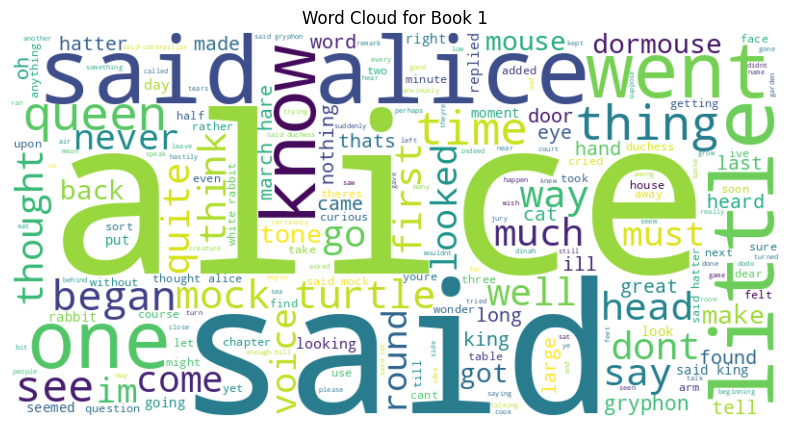

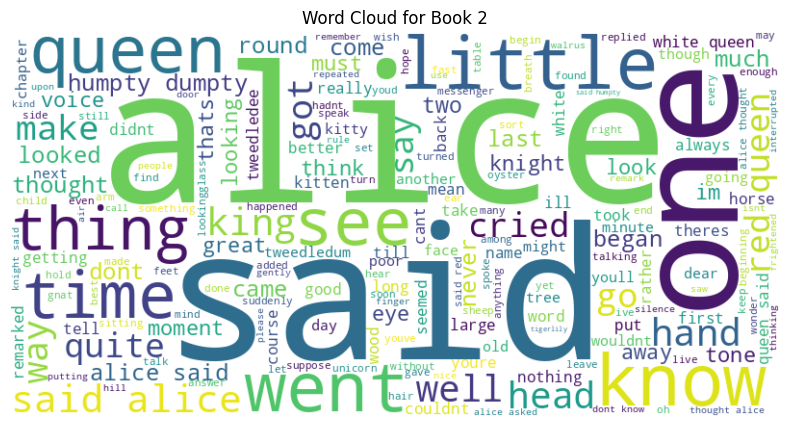

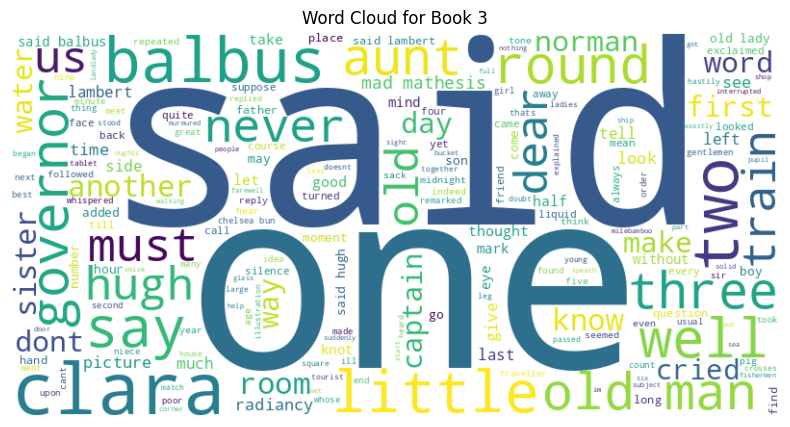

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nltk.download('stopwords', quiet=True)

# Assuming 'loaded_corpus' contains the cleaned text for each book.
for i, text in enumerate(loaded_corpus):
  # Tokenize the text
  tokens = word_tokenize(text.lower())

  # Remove non-alphanumeric characters and stop words
  stop_words = nltk.corpus.stopwords.words('english')  # Use NLTK's built-in stopwords
  cleaned_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.lower() not in stop_words and token.isalnum()]

  # Create a string from cleaned tokens
  text_for_wordcloud = " ".join(cleaned_tokens)

  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Book {i+1}")
  plt.show()


In [19]:
from collections import Counter

combined_text = " ".join(loaded_corpus)

tokens = word_tokenize(combined_text.lower())

# Remove non-alphanumeric characters and stop words
stop_words = nltk.corpus.stopwords.words('english')
cleaned_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.lower() not in stop_words and token.isalnum()]

# Count word frequencies
word_counts = Counter(cleaned_tokens)

# Get the 5 most frequent words
most_frequent_words = word_counts.most_common(5)

# Print the results
print("Five most frequent words:")
for word, count in most_frequent_words:
    print(f"{word}: {count}")


Five most frequent words:
said: 1053
alice: 826
one: 321
little: 269
queen: 249


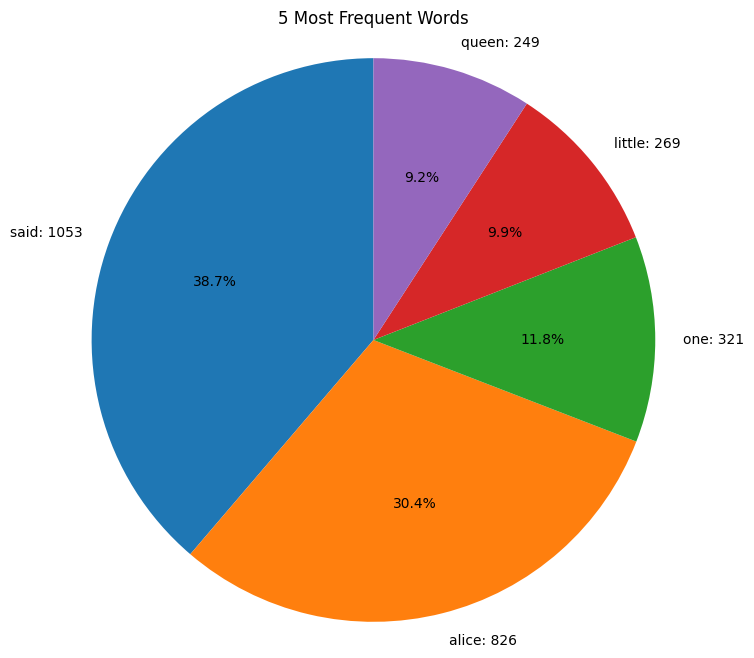

In [21]:
# prompt: Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

# Assuming 'most_frequent_words' is already defined as in the provided code.

# Extract words and counts
words = [word for word, count in most_frequent_words]
counts = [count for word, count in most_frequent_words]

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=[f"{word}: {count}" for word, count in most_frequent_words], autopct='%1.1f%%', startangle=90)
plt.title("5 Most Frequent Words")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1,max_df=2)
tfidf_matrix = vectorizer.fit_transform(loaded_corpus)

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

print("Some feature names:", feature_names[:20])


Shape of TF-IDF matrix: (3, 5131)
Some feature names: ['10' '102' '106' '10inch' '11' '112' '12inch' '13' '130' '132' '135'
 '13inch' '142' '17' '1880' '1885' '1885_' '19' '27' '2nd']


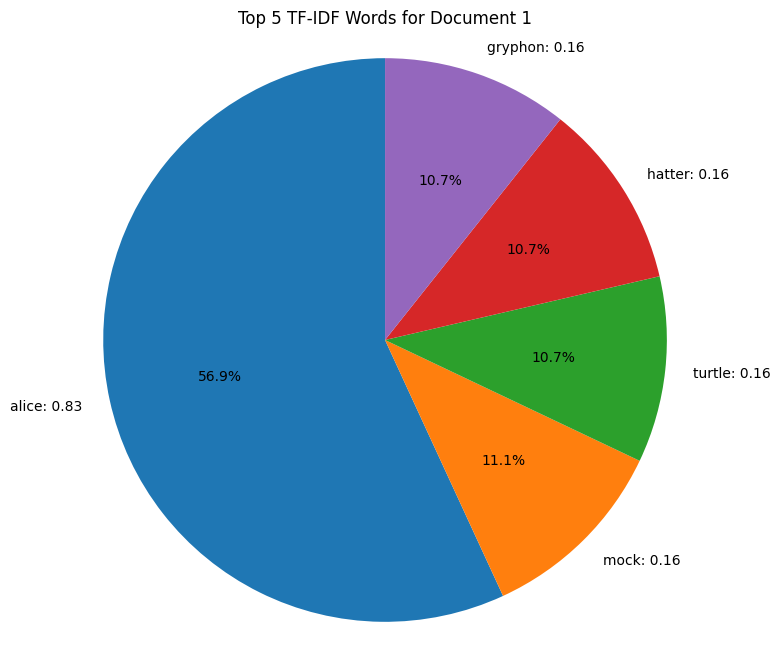

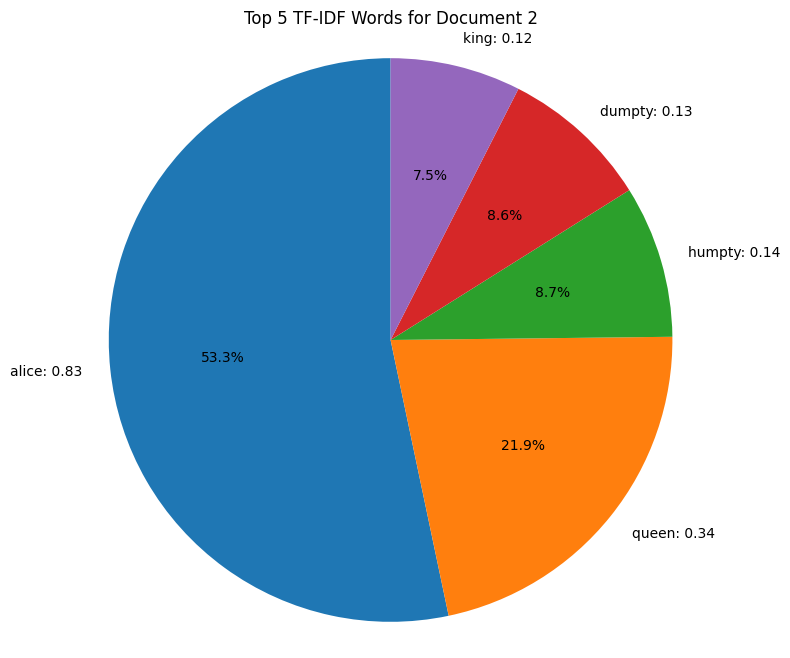

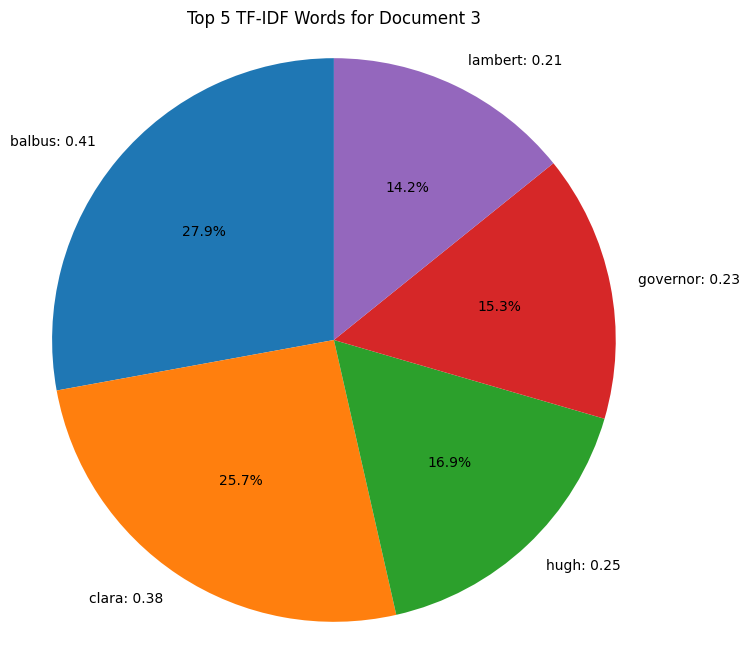

In [25]:
import numpy as np


for i in range(len(loaded_corpus)):

    tfidf_scores = tfidf_matrix[i].toarray().flatten()

    # Sort the scores in descending order and get the indices of the top 5 words
    top_indices = np.argsort(tfidf_scores)[::-1][:5]

    top_words = [feature_names[index] for index in top_indices]
    top_scores = [tfidf_scores[index] for index in top_indices]

    plt.figure(figsize=(8, 8))
    plt.pie(top_scores, labels=[f"{word}: {score:.2f}" for word, score in zip(top_words, top_scores)], autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 TF-IDF Words for Document {i + 1}")
    plt.axis('equal')
    plt.show()
